<a href="https://colab.research.google.com/github/dportelacassab/DS-2020/blob/master/Copia_de_OOP_NN(two_neurons_one_hidden_layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


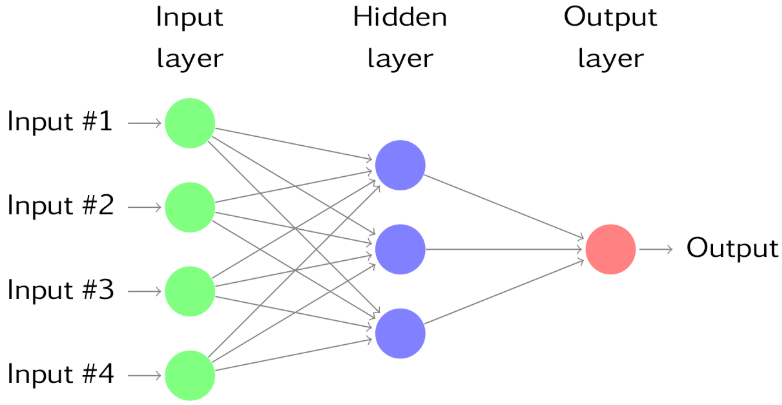

In [16]:
import time
start_time = time.time()

#https://www.youtube.com/watch?v=Py4xvZx-A1E
#import os
#print(os.getcwd())
#os.chdir('C:/Users/Usuario/Desktop/DiegoAlejandro/2020-1/4) Data Mining')
#print(os.getcwd())
from IPython.display import Image
Image(filename='nn-perceptron2.png') #Image taken from
#https://otexts.com/fpp2/nnetar.html

In [0]:
x=5
x=10

In [9]:
import numpy as np
class NeuralNetwork():
    
    #dunder method, it takes itself as a standar variable that can later be used
    def __init__(self):
        np.random.seed(1)
        self.W = 2* np.random.random((3,2))-1
        self.W1 = 2* np.random.random((2,1))-1
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivate(self, x):
        return x*(1-x)
    
    def train(self, traninig_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
                
            phii = self.think(training_inputs, self.W)
            outputs = self.think(phii, self.W1)
            
            for k in range(0, len(self.W[0,:]) ):
                er = phii[:,k]-outputs
                self.W[:,k] = self.W[:,k] + np.dot(traninig_inputs.T,np.dot(er,self.sigmoid_derivate(phii[:,k])))
                
            error = training_outputs - outputs
            self.W1 = self.W1 + np.dot(phii.T,error*self.sigmoid_derivate(outputs))
            
    def think(self, input, weights):
        for i in range(0,len(weights[0,:]) ):
            input = input.astype(float)
            output = np.zeros((len(input),len(weights[0,:])))
            output[:,i] = self.sigmoid( np.dot(input, weights[:,i]) )
        return output

##########################################################################################################################   
if __name__ == "__main__":
    
    neural_network = NeuralNetwork()
    print(neural_network.W)
    print('\n')
    print(neural_network.W1)
    print('\n')
    training_inputs = np.array([[0, 0,  1],
                                [1, 1, 1],
                                [1, 0, 1],
                                [0, 1, 1]])
    training_outputs = np.array([[0, 1, 1, 0]]).T
    neural_network.train(training_inputs, training_outputs, 1000)
    print( )
    print(neural_network.W)
    print('\n')
    print(neural_network.W1)
    print('\n')
    
    
#print(neural_network.error) #for commenting several lines, Ctrl + } key` 
print("--- %s seconds ---" % (time.time() - start_time))

[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]


[[-0.62747958]
 [-0.30887855]]



[[-0.16595599 -3.00629799]
 [-0.99977125 -3.86065328]
 [-0.70648822 -7.72110313]]


[[-0.62747958]
 [-0.48228106]]


--- 8.847661256790161 seconds ---


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
A = str(input("input 1: "))
B = str(input("input 2: "))
C = str(input("input 3: "))

print("New situtation input data = ", A, B, C)
print(neural_network.think(np.array([A, B, C]), neural_network.W1))

In [0]:
phii = neural_network.sigmoid(np.dot(training_inputs, neural_network.W))
print(phii)

[[0.33037528 0.3067574 ]
 [0.13328558 0.31647723]
 [0.29474597 0.40741215]
 [0.15364951 0.22958471]]


In [0]:
ygor = neural_network.sigmoid(np.dot(phii,neural_network.W1))
print(ygor)

[[0.42198609]
 [0.44430842]
 [0.41406041]
 [0.45399674]]


In [0]:
er = training_outputs - ygor
print(er)

[[-0.42198609]
 [ 0.55569158]
 [ 0.58593959]
 [-0.45399674]]


In [0]:
#print(neural_network.sigmoid_derivate(ygor))
print(er*neural_network.sigmoid_derivate(ygor))
w1 = neural_network.W1 + np.dot(phii.T,er*neural_network.sigmoid_derivate(ygor))
print(w1)

[[-0.10292824]
 [ 0.13719939]
 [ 0.14215737]
 [-0.11253839]]
[[-0.61858898]
 [-0.23985892]]
